In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use("ggplot")
sns.set()

In [2]:
import matplotlib.image as mpimg
from PIL import Image


def show(path):
    img = mpimg.imread(path)
    sns.reset_orig()
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.imshow(img)
    sns.set()

# Linear Regression Loss Diagram

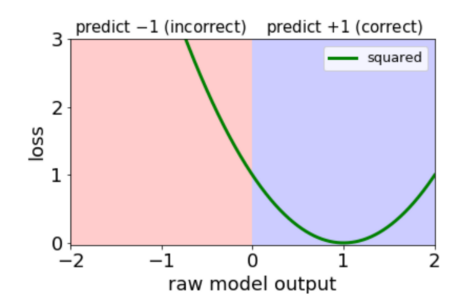

In [14]:
show(r'images/linear_regression_lossDiagram.png')

In [3]:
display(
    Markdown(
        rf"""
#### Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over $ 25,000 sq.ft. $
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= $1$ if tract bounds river; $0$ otherwise)
- NOX      nitric oxides concentration (parts per $10$ million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to $1940$
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- PTRATIO  pupil-teacher ratio by town
- B        $1000 (Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $\$1000's$
- TAX      Full-value property-tax rate per $\$10,000$
"""
    )
)


#### Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over $ 25,000 sq.ft. $
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= $1$ if tract bounds river; $0$ otherwise)
- NOX      nitric oxides concentration (parts per $10$ million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to $1940$
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- PTRATIO  pupil-teacher ratio by town
- B        $1000 (Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $\$1000's$
- TAX      Full-value property-tax rate per $\$10,000$


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


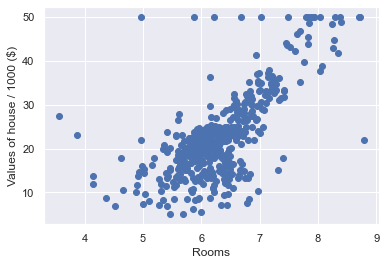

In [4]:
# Introduction to linear regression( OLS Ordinary Least Squares)
from sklearn import datasets
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()
# print(boston.keys())
# print(boston.feature_names)

df2 = pd.DataFrame(boston.data, columns=boston.feature_names)
display(df2.head())
X_ = boston.data
# Target is MEDV
y_ = boston.target

# First let's take a single feature 6th column (rooms)
X_rooms = X_[:, 5]

# Convert both to column vectors
y_ = y_.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

# We will visualise the relation between price of the house and avergae number of rooms
plt.scatter(X_rooms, y_)
plt.xlabel("Rooms")
plt.ylabel("Values of house / 1000 ($)")
plt.show()

# We can see that more number of rooms leads to more price generally.

#### Ordinary Least Squares (OLS): 
```Minimise the residuals sum. As large positive residual cancels out large negative residual, therefore we take sum of square of residuals.```

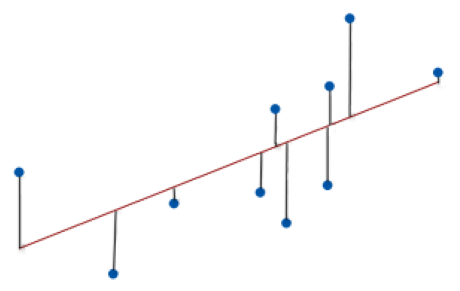

In [5]:
path = r"images/residuals.png"
show(path)

(50, 1)


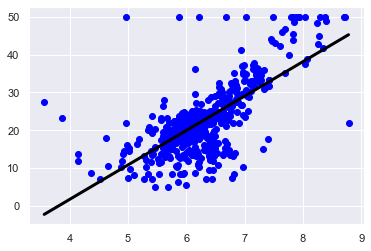

Score of the model is ($R^2$ value as we call it): $0.48352545599133423$

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y_)

# Linspcae ----> equally distributed nd array between min,max values inclusive.
# Defaut size=50,3rd param=size of linspace
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
print(prediction_space.shape)
plt.scatter(X_rooms, y_, color="blue")
plt.plot(prediction_space, reg.predict(prediction_space), color="black", linewidth=3)
plt.show()

display(
    Markdown(
        rf"""Score of the model is ($R^2$ value as we call it): ${reg.score(X_rooms, y_)}$"""
    )
)

In [7]:
# Measuring model performance using Train/Test data split
from sklearn.model_selection import train_test_split

# Split the data in two parts
# default test_size is 0.25
# 30% for testing the model after it is trained to check the accuracy of the model and
# 70% for training the model
# random_state seed helps us later to reproduce the exact split downstream results
# stratisfy = labels data ensure the split contains the same distribution as in input
X_train, X_test, y_train, y_test = train_test_split(
    X_, y_, test_size=0.30, random_state=42
)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

# In addition to computing the R2 score, we will also compute the Root Mean Squared Error (RMSE),
# which is another commonly used metric to evaluate regression models

# In statistics, the coefficient of determination, denoted R^{2} and pronounced "R squared",
# is the proportion of the variance in the dependent variable that is predictable
# from the independent variable(s).

# The better the linear regression fits the data in comparison to the
# simple average, the closer the value of R^{2} is to 1.

# y_mean=np.mean(y_test)
# ss_tot=np.sum(np.square(y_test-y_mean))
# ss_res=np.sum(np.square(y_test-y_pred))
# print(1-(ss_res/ss_tot))
display(Markdown(rf"""$R^2: {reg_all.score(X_test, y_test)}$"""))

# np.sqrt(ss_res/n)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
display(Markdown(rf"Root Mean Squared Error: {rmse}"))

$R^2: 0.7112260057484908$

Root Mean Squared Error: 4.63868992617284

# Cross Validation

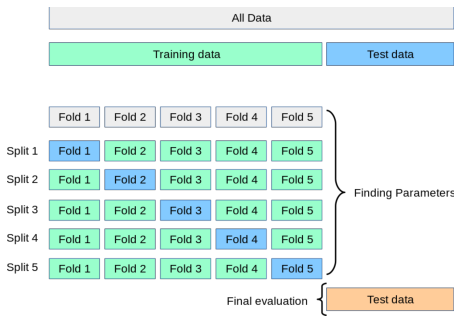

In [8]:
path = r"./images/grid_search_cross_validation.png"
show(path)

In [9]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_results = cross_val_score(reg, X_, y_, cv=5)
# Calculate time by each k-fold
# %timeit cross_val_score(reg,X_,y_,cv=5)
# R**2 values of result
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


# Ridge Regression (Linear Regression with L2 Norm)
### Default in Sklearn
<span style="font-size:1.4em"> Loss Function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_{i}^{2}$ </span>

In [10]:
# Regularized Regression
# 1. Ridge regression (L2 Norm)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(ridge.score(X_test, y_test))

0.6996938275127313


# Lasso Regression (Linear Regression with L1 Norm)

<span style="font-size:1.4em"> Loss Function = OLS loss function + $\alpha * \sum_{i=1}^{n} \left|a_{i}\right|$ </span>

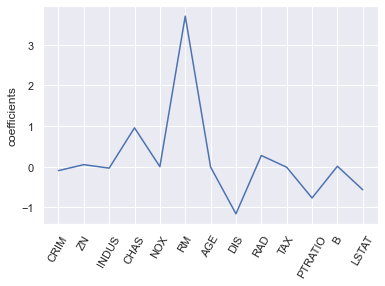

In [11]:
# 2. Lasso regression (L1 Norm)
# Useful as it sets the coefficients to zero for less significant features
# Therefore it can be used to select important features using lasso algorithm.
from sklearn.linear_model import Lasso

names = boston.feature_names
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_, y_).coef_

_ = plt.plot(range(len(names)), lasso_coef)

# Names will be rotated by 60 degrees anticlockwise
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel("coefficients")
plt.show()
# Rooms have most importance as expected

In [12]:
# 3. Elastic Net (penalty=a*L1+b*L2) Combination of both the norms
# In scikit-learn, this term is represented by the 'l1_ratio' parameter:
# An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

gapminder = pd.read_csv("./datasets/gapminder.csv")
X = gapminder.drop(["life", "Region"], axis=1).values
y = gapminder["life"].values

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {"l1_ratio": l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.4862175850645, tolerance: 0.558941590909091
  model = cd_fast.enet_coordinate_descent(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.8466391486292, tolerance: 0.5893071666666668
  model = cd_fast.enet_coordinate_descent(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.5034400806133, tolerance: 0.5890250303030303
  model = cd_fast.enet_coordinate_desce

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398445


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Setup the pipeline steps: steps
steps = [
    ("imputer", SimpleImputer(missing_values="NaN", strategy="mean")),
    ("scaler", StandardScaler()),
    ("elasticnet", ElasticNet()),
]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"elasticnet__l1_ratio": np.linspace(0, 1, 30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
# gm_cv.fit(X_train, y_train)

# Compute and print the metrics
# r2 = gm_cv.score(X_test, y_test)
# print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
# print("Tuned ElasticNet R squared: {}".format(r2))